# Customer Segmentation with K-Means Clustering

## Import packages

In [1]:
import numpy as np 
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_palette("Dark2")

## Import Data

Source of data: Kaggle
https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

In [2]:
segment_df = pd.read_csv("shopping-data.csv")

In [3]:
sub_df = segment_df.drop(columns = ["CustomerID"])

## Explore Data

In [4]:
# View data
segment_df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
# Calculate percentange of gender
gender_percent = pd.DataFrame()
gender_percent["Count"] = segment_df.groupby("Genre")["CustomerID"].count()
gender_percent["Percent"] = gender_percent["Count"] / gender_percent["Count"].sum() * 100
gender_percent["Percent"] = gender_percent["Percent"].astype(int)

female = gender_percent["Percent"].iloc[0]
male = gender_percent["Percent"].iloc[1]

gender_percent


,Count,Percent
Genre,,
Female,112,56
Male,88,44


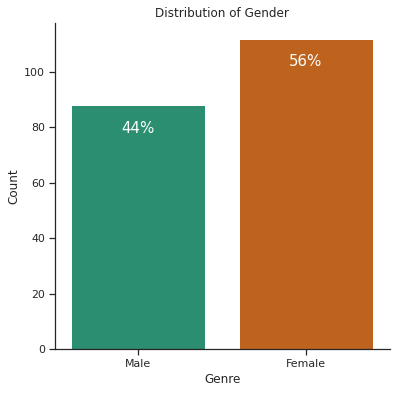

In [7]:
plt.figure(figsize = (6, 6))
sns.countplot(data = segment_df, x = "Genre")
plt.annotate(str(female)+"%", xy=(1, gender_percent["Count"].iloc[0]-10), color = 'white', size = 15, ha = 'center')
plt.annotate(str(male)+"%", xy=(0,gender_percent["Count"].iloc[1]-10), color = 'white', size = 15, ha = 'center')
plt.ylabel("Count")
plt.title("Distribution of Gender")
plt.show()

<Figure size 1080x432 with 0 Axes>

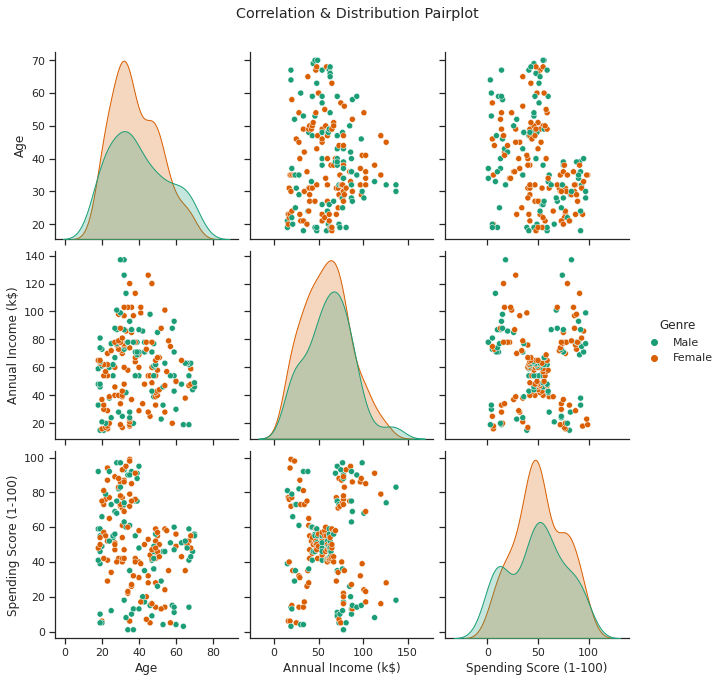

In [8]:
plt.figure(figsize = (15, 6))
sns.pairplot(sub_df, hue = "Genre", height = 3)
plt.suptitle("Correlation & Distribution Pairplot", y=1.05)
plt.show()

In [9]:
scaler = StandardScaler()
features = segment_df[["Age", "Annual Income (k$)"]]
std_features = scaler.fit_transform(features)

In [10]:
std_features_df = pd.DataFrame({"std_age": std_features[:, 0], "std_income": std_features[:, 1]})
std_features_df

,std_age,std_income
0,-1.424569,-1.738999
1,-1.281035,-1.738999
2,-1.352802,-1.700830
3,-1.137502,-1.700830
4,-0.563369,-1.662660
...,...,...
195,-0.276302,2.268791
196,0.441365,2.497807
197,-0.491602,2.497807
198,-0.491602,2.917671


In [12]:
std_df = pd.concat([std_features_df, segment_df["Genre"]], axis = 1)
std_df

,std_age,std_income,Genre
0,-1.424569,-1.738999,Male
1,-1.281035,-1.738999,Male
2,-1.352802,-1.700830,Female
3,-1.137502,-1.700830,Female
4,-0.563369,-1.662660,Female
...,...,...,...
195,-0.276302,2.268791,Female
196,0.441365,2.497807,Female
197,-0.491602,2.497807,Male
198,-0.491602,2.917671,Male


In [13]:
male_std_df = std_df[std_df["Genre"] == "Male"][["std_age", "std_income"]]
female_std_df = std_df[std_df["Genre"] == "Female"][["std_age", "std_income"]]

### Finding the Optimal Number of Clusters

#### The Elbow Method

In [14]:
inertia_all = []
for n in range(1 , 11):
    km = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 19))
    km.fit(std_features_df)
    inertia_all.append(km.inertia_)

inertia_f = []
for n in range(1 , 11):
    km = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 19))
    km.fit(female_std_df)
    inertia_f.append(km.inertia_)

inertia_m = []
for n in range(1 , 11):
    km = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 19))
    km.fit(male_std_df)
    inertia_m.append(km.inertia_)

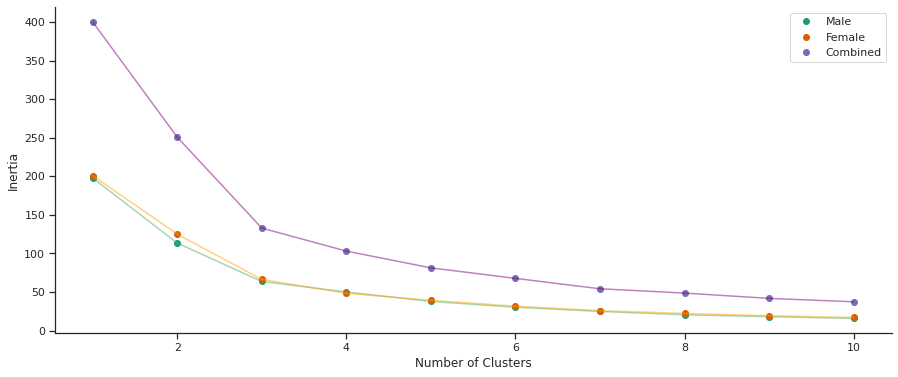

In [15]:
plt.figure(figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia_m, 'o', label = "Male")
plt.plot(np.arange(1 , 11) , inertia_m, '-' , alpha = 0.5, color = 'g')
plt.plot(np.arange(1 , 11) , inertia_f, 'o', label = "Female")
plt.plot(np.arange(1 , 11) , inertia_f, '-' , alpha = 0.5, color = 'orange')
plt.plot(np.arange(1 , 11) , inertia_all, 'o', label = "Combined")
plt.plot(np.arange(1 , 11) , inertia_all, '-' , alpha = 0.5, color = 'purple')
plt.legend()
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

#### The Silhouette Score

In [16]:
ss_all = []
for n in range(2, 11):
    km = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 19))
    predict = km.fit_predict(std_features_df)
    score = silhouette_score(X = std_features_df, labels = predict)
    ss_all.append(score)

ss_m = []
for n in range(2, 11):
    km = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 19))
    predict = km.fit_predict(male_std_df)
    score = silhouette_score(X = male_std_df, labels = predict)
    ss_m.append(score)

ss_f = []
for n in range(2, 11):
    km = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 19))
    predict = km.fit_predict(female_std_df)
    score = silhouette_score(X = female_std_df, labels = predict)
    ss_f.append(score)

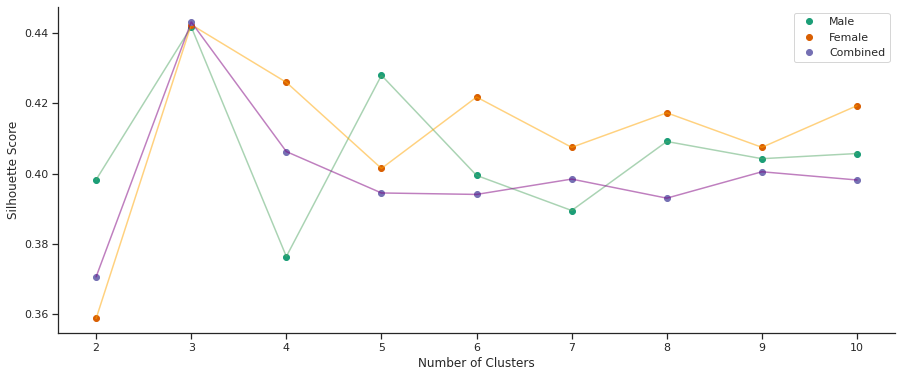

In [17]:
plt.figure(figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , ss_m , 'o', label = "Male")
plt.plot(np.arange(2 , 11) , ss_m , '-' , alpha = 0.5, color = 'g')
plt.plot(np.arange(2 , 11) , ss_f , 'o', label = "Female")
plt.plot(np.arange(2 , 11) , ss_f , '-' , alpha = 0.5, color = 'orange')
plt.plot(np.arange(2 , 11) , ss_all , 'o', label = "Combined")
plt.plot(np.arange(2 , 11) , ss_all , '-' , alpha = 0.5, color = 'purple')
plt.legend()
plt.xlabel('Number of Clusters') , plt.ylabel('Silhouette Score')
plt.show()

In [18]:
# Females
km = (KMeans(n_clusters = 3, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 19))
km.fit(female_std_df)
f_labels = km.labels_
f_centroids = km.cluster_centers_

# Males
km = (KMeans(n_clusters = 3, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 19))
km.fit(male_std_df)
m_labels = km.labels_
m_centroids = km.cluster_centers_

# Combined
km = (KMeans(n_clusters = 3, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 19))
km.fit(std_features_df)
all_labels = km.labels_
all_centroids = km.cluster_centers_

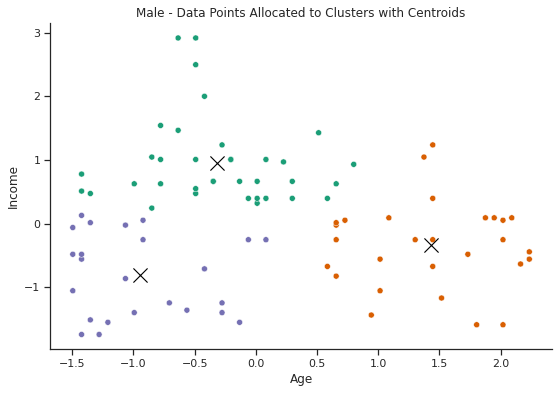

In [19]:
plt.figure(figsize = (9,6))
sns.scatterplot(x = male_std_df.iloc[:, 0], y = male_std_df.iloc[:, -1], hue = m_labels, palette = "Dark2", legend = False)
sns.scatterplot(x = m_centroids[:, 0], y = m_centroids[:, 1], color = "black", marker = "x", s = 200)
plt.ylabel("Income")
plt.xlabel("Age")
plt.title("Male - Data Points Allocated to Clusters with Centroids")
plt.show()

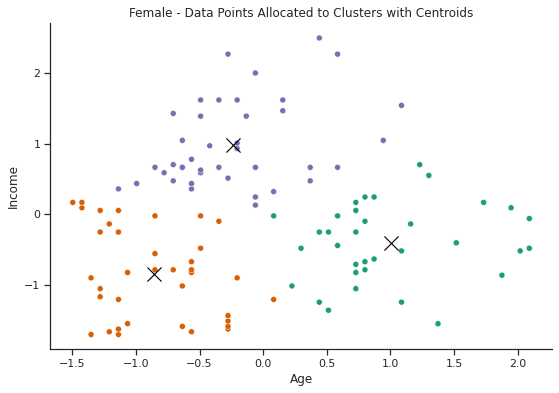

In [20]:
plt.figure(figsize = (9,6))
sns.scatterplot(x = female_std_df.iloc[:, 0], y = female_std_df.iloc[:, -1], hue = f_labels, palette = "Dark2", legend = False)
sns.scatterplot(x = f_centroids[:, 0], y = f_centroids[:, 1], color = "black", marker = "x", s = 200)
plt.ylabel("Income")
plt.xlabel("Age")
plt.title("Female - Data Points Allocated to Clusters with Centroids")
plt.show()

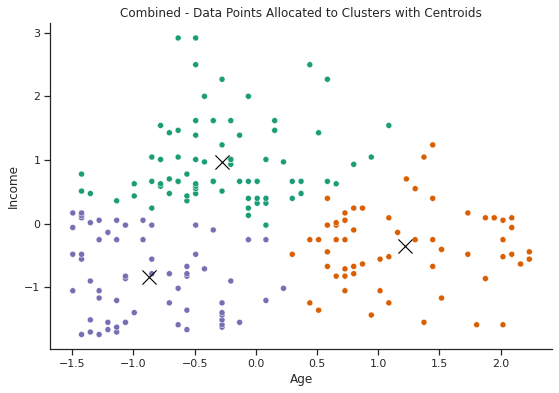

In [21]:
plt.figure(figsize = (9,6))
sns.scatterplot(x = std_features_df.iloc[:, 0], y = std_features_df.iloc[:, -1], hue = all_labels, palette = "Dark2", legend = False)
sns.scatterplot(x = all_centroids[:, 0], y = all_centroids[:, 1], color = "black", marker = "x", s = 200)
plt.ylabel("Income")
plt.xlabel("Age")
plt.title("Combined - Data Points Allocated to Clusters with Centroids")
plt.show()